<a href="https://colab.research.google.com/github/Samieh96/Click-Through-Rate-Prediction/blob/main/ctr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
import random
from scipy.stats import norm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date, time
from sklearn.svm import LinearSVC
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train=pd.read_csv('/content/drive/My Drive/Colab Notebooks/1Mtrain.csv.rar (Unzipped Files)/1Mtrain.csv.csv')

In [ ]:
train.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10016879928769896114,0,14102100,1005,0,83a0ad1a,5c9ae867,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,f17268a6,575d0d2a,1,0,18945,320,50,2153,3,427,100063,61
1,10018076683759767024,1,14102100,1002,0,84c7ba46,c4e18dd6,50e219e0,ecad2386,7801e8d9,07d7df22,e62f1261,7b485f88,cf19f7f7,0,0,21300,320,50,2446,3,171,100228,156
2,10022961149355219548,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,e2fcccd2,5c5a694b,0f2161f8,bd7c02a1,51197d98,2203a096,1,0,4687,320,50,423,2,39,100148,32
3,10032264153126123156,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,27cab2a3,ecb851b2,1,0,15705,320,50,1722,0,35,100084,79
4,10045287352545275389,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,1779deee,2347f47a,f95efa07,a99f214a,d5d1473b,cdfde03b,1,0,20596,320,50,2161,0,35,-1,157


In [ ]:
train.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,1e+06,NaN,NaN,NaN,9.22487e+18,5.32521e+18,4.88676e+12,4.61305e+18,9.22696e+18,1.38365e+19,1.84467e+19
click,1e+06,NaN,NaN,NaN,0.170168,0.375781,0,0,0,0,1
hour,1e+06,NaN,NaN,NaN,1.41026e+07,296.75,1.41021e+07,1.41023e+07,1.41026e+07,1.41028e+07,1.4103e+07
C1,1e+06,NaN,NaN,NaN,1004.97,1.09166,1001,1005,1005,1005,1012
banner_pos,1e+06,NaN,NaN,NaN,0.287528,0.505941,0,0,0,1,7
site_id,1000000,2682,85f751fd,361152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
site_domain,1000000,2862,c4e18dd6,374395,NaN,NaN,NaN,NaN,NaN,NaN,NaN
site_category,1000000,22,50e219e0,409472,NaN,NaN,NaN,NaN,NaN,NaN,NaN
app_id,1000000,3194,ecad2386,638848,NaN,NaN,NaN,NaN,NaN,NaN,NaN
app_domain,1000000,210,7801e8d9,673263,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We see 17% of ads were clicked.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   id                1000000 non-null  uint64
 1   click             1000000 non-null  int64 
 2   hour              1000000 non-null  int64 
 3   C1                1000000 non-null  int64 
 4   banner_pos        1000000 non-null  int64 
 5   site_id           1000000 non-null  object
 6   site_domain       1000000 non-null  object
 7   site_category     1000000 non-null  object
 8   app_id            1000000 non-null  object
 9   app_domain        1000000 non-null  object
 10  app_category      1000000 non-null  object
 11  device_id         1000000 non-null  object
 12  device_ip         1000000 non-null  object
 13  device_model      1000000 non-null  object
 14  device_type       1000000 non-null  int64 
 15  device_conn_type  1000000 non-null  int64 
 16  C14               1

In [ ]:
train.keys()

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

In [ ]:
print("rows: ", train.shape[0])
print("columns: ", train.shape[1])

rows:  1000000
columns:  24


In [ ]:
train.isnull().sum().sort_values(ascending = False)

C21                 0
C20                 0
click               0
hour                0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
id                  0
dtype: int64

As we see there is  no missing data. Now we want to check if there is any outliers.

In [ ]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id                  9.223408e+18
click               0.000000e+00
hour                5.100000e+02
C1                  0.000000e+00
banner_pos          1.000000e+00
device_type         0.000000e+00
device_conn_type    0.000000e+00
C14                 4.974000e+03
C15                 0.000000e+00
C16                 0.000000e+00
C17                 6.630000e+02
C18                 3.000000e+00
C19                 1.360000e+02
C20                 1.000950e+05
C21                 7.800000e+01
dtype: float64


In [ ]:
train_out = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
print(train_out.shape)

(366558, 24)


We use the IQR scores to remove outliers. The rule of thumb is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed. After doing so, the shape of this data, which comes out to be 366558 observations of 24 variables. This shows that for our data, a lot of records get deleted if we use the IQR method.

In [ ]:
train_out.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
3,10032264153126123156,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,27cab2a3,ecb851b2,1,0,15705,320,50,1722,0,35,100084,79
4,10045287352545275389,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,1779deee,2347f47a,f95efa07,a99f214a,d5d1473b,cdfde03b,1,0,20596,320,50,2161,0,35,-1,157
7,10069716898669651698,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,febd1138,82e27996,0f2161f8,a99f214a,49c5a80d,2ea4f8ba,1,0,21611,320,50,2480,3,297,100111,61
9,10083146080076673654,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,849e866f,1aa0e912,1,0,15707,320,50,1722,0,35,-1,79
11,10098567175257284199,0,14102100,1005,0,2328ee8e,7804dea6,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,7420b2f5,c4cff2ea,1,0,20352,320,50,2333,0,39,-1,157


In [ ]:
# calculate summary statistics
data_mean, data_std = np.mean(train_out['C21']), np.std(train_out['C21'])
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
 
# identify outliers
outliers = [x for x in train_out['C21'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 5761


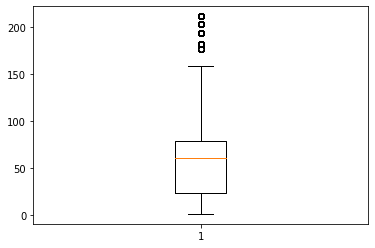

In [ ]:
plt.boxplot(train_out['C21'])
plt.show()

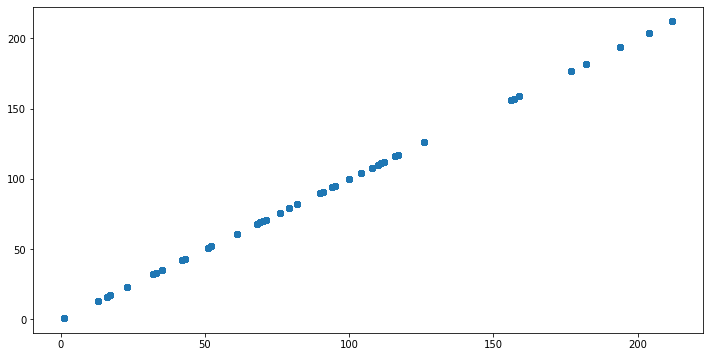

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(train_out['C21'], train_out['C21'])

plt.show()

In [ ]:
# calculate summary statistics
data_mean, data_std = np.mean(train['C14']), np.std(train['C14'])
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

# identify outliers
outliers = [x for x in train['C14'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))


Identified outliers: 18636


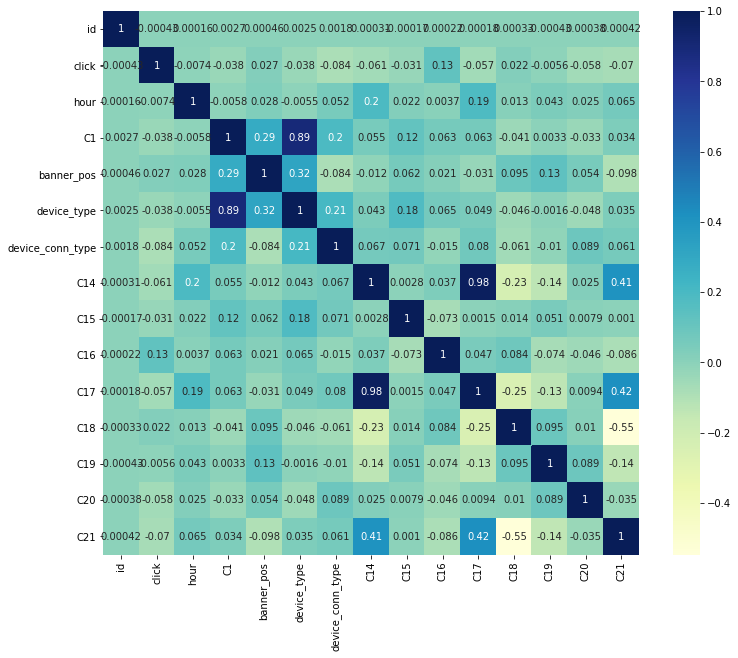

In [ ]:
plt.figure(figsize=(12,10)) 
sns.heatmap(train.corr(),annot=True,cmap ='YlGnBu')

The correlation between C14 and C17 and  device_type and C1 is strong.


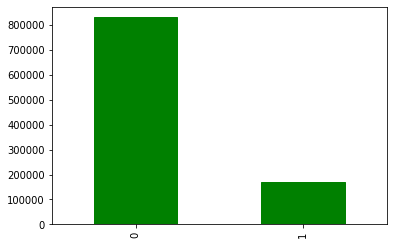

In [ ]:
train['click'].value_counts().plot.bar(facecolor = 'g',edgecolor= 'g')

 We need to encode our objects dtypes because machine learning algorithms can only learn from numbers (int, float, doubles .. ). one way is to use label encoding.



In [ ]:
train_new = train.drop(['id', 'click', 'hour', 'C1', 'banner_pos','device_type', 'device_conn_type', 'C14','C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'], axis=1)
train_new.head()

,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model
0,83a0ad1a,5c9ae867,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,f17268a6,575d0d2a
1,84c7ba46,c4e18dd6,50e219e0,ecad2386,7801e8d9,07d7df22,e62f1261,7b485f88,cf19f7f7
2,85f751fd,c4e18dd6,50e219e0,e2fcccd2,5c5a694b,0f2161f8,bd7c02a1,51197d98,2203a096
3,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,27cab2a3,ecb851b2
4,85f751fd,c4e18dd6,50e219e0,1779deee,2347f47a,f95efa07,a99f214a,d5d1473b,cdfde03b


In [ ]:
le = preprocessing.LabelEncoder()
train_new = train_new.apply(le.fit_transform)

In [ ]:
train_new.head()

,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model
0,1378,1058,20,2946,93,0,100030,523564,1772
1,1391,2221,5,2946,93,0,135393,267529,4169
2,1401,2221,5,2819,69,3,111611,175939,644
3,323,2717,1,2946,93,0,100030,86658,4783
4,1401,2221,5,268,25,25,100030,463740,4147


In [ ]:
columns_to_overwrite = ['site_id', 'site_domain', 'site_category', 'app_id', 'app_domain','app_category', 'device_id', 'device_ip', 'device_model']
train.drop(labels=columns_to_overwrite, axis="columns", inplace=True)
train[columns_to_overwrite] = train_new[columns_to_overwrite]

In [ ]:
train.head()

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model
0,10016879928769896114,0,14102100,1005,0,1,0,18945,320,50,2153,3,427,100063,61,1378,1058,20,2946,93,0,100030,523564,1772
1,10018076683759767024,1,14102100,1002,0,0,0,21300,320,50,2446,3,171,100228,156,1391,2221,5,2946,93,0,135393,267529,4169
2,10022961149355219548,0,14102100,1005,0,1,0,4687,320,50,423,2,39,100148,32,1401,2221,5,2819,69,3,111611,175939,644
3,10032264153126123156,0,14102100,1005,0,1,0,15705,320,50,1722,0,35,100084,79,323,2717,1,2946,93,0,100030,86658,4783
4,10045287352545275389,0,14102100,1005,0,1,0,20596,320,50,2161,0,35,-1,157,1401,2221,5,268,25,25,100030,463740,4147


In [ ]:
features = train.loc[:,train.columns!='click'].values[:,1:]
scalar = MinMaxScaler((-1,1))
x = scalar.fit_transform(features)
y = train.loc[:,'click'].values


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=1)
model = LinearSVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.827645


In [ ]:
#deleting C14 and C1 since they were highly correlated. Also deleting outliers

train1 = train.drop(['id','C14','C1'], axis= 1)
train1.head()

,click,hour,banner_pos,device_type,device_conn_type,C15,C16,C17,C18,C19,C20,C21,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model
0,0,14102100,0,1,0,320,50,2153,3,427,100063,61,1378,1058,20,2946,93,0,100030,523564,1772
1,1,14102100,0,0,0,320,50,2446,3,171,100228,156,1391,2221,5,2946,93,0,135393,267529,4169
2,0,14102100,0,1,0,320,50,423,2,39,100148,32,1401,2221,5,2819,69,3,111611,175939,644
3,0,14102100,0,1,0,320,50,1722,0,35,100084,79,323,2717,1,2946,93,0,100030,86658,4783
4,0,14102100,0,1,0,320,50,2161,0,35,-1,157,1401,2221,5,268,25,25,100030,463740,4147


In [ ]:
features = train1.loc[:,train1.columns!='click'].values[:,1:]
scalar = MinMaxScaler((-1,1))
x1 = scalar.fit_transform(features)
y1 = train1.loc[:,'click'].values

x_1, x_ts, y_1, y_ts = train_test_split(x1, y1, test_size=0.2,random_state=1)
model = LinearSVC()
model.fit(x_1, y_1)
y_pred = model.predict(x_1)
print(accuracy_score(y_1, y_pred))

0.82872625


In [ ]:
train2 = train.drop(['id','C14'], axis= 1)
train2.keys()

Index(['click', 'hour', 'C1', 'banner_pos', 'device_type', 'device_conn_type',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'site_id',
       'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category',
       'device_id', 'device_ip', 'device_model'],
      dtype='object')

In [ ]:
features = train2.loc[:,train2.columns!='click'].values[:,1:]
scalar = MinMaxScaler((-1,1))
x2 = scalar.fit_transform(features)
y2 = train2.loc[:,'click'].values

x_2, x_tes, y_2, y_tes = train_test_split(x2, y2, test_size=0.2,random_state=1)
model = LinearSVC()
model.fit(x_2, y_2)
y_pred = model.predict(x_2)
print(accuracy_score(y_2, y_pred))

0.828725


Until now the model on 'train1' works better.